In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv("MFG10YearTerminationData.csv")

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64


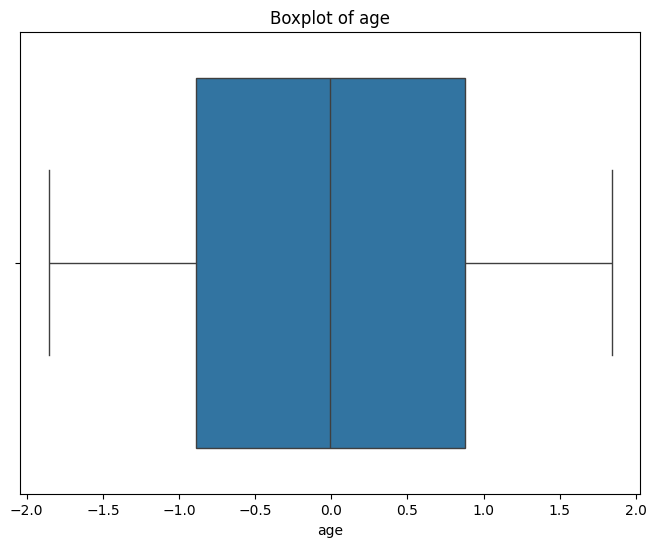

In [48]:
# Mengecek missing value
print(df.isnull().sum())

# Menghapus rows yang memiliki missing value
df.dropna(inplace=True)

# Mengecek duplicate values
df.duplicated().sum()

# Menghapus rows yang memiliki duplicate value
df.drop_duplicates(inplace=True)

# Mengecek outliers dengan box plot
# Memakan atribut 'age'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'])
plt.title('Boxplot of age')
plt.show()

# Menghandle outliers pada atribut 'age'
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR)))]


1. **Mengecek missing value:**
   - Kode `df.isnull().sum()` digunakan untuk menghitung jumlah missing values di setiap kolom dataframe.

2. **Menghapus rows dengan missing value:**
   - `df.dropna(inplace=True)` menghapus semua baris yang mengandung missing values dari dataframe.

3. **Mengecek duplicate values:**
   - `df.duplicated().sum()` digunakan untuk menghitung jumlah baris yang duplikat.

4. **Menghapus rows dengan duplicate values:**
   - `df.drop_duplicates(inplace=True)` menghapus semua baris yang duplikat dari dataframe.

5. **Mengecek outliers pada atribut 'age' dengan boxplot:**
   - Boxplot untuk kolom 'age' ditampilkan menggunakan `sns.boxplot()` untuk mendeteksi outliers.

6. **Menghandle outliers pada atribut 'age':**
   - Menggunakan metode IQR (Interquartile Range), outliers dihapus dari kolom 'age'. Nilai yang berada di bawah Q1 - 1.5*IQR atau di atas Q3 + 1.5*IQR dianggap sebagai outliers dan dihapus dari dataframe.

In [47]:
# Pilih kolom numerik yang ingin di standarisasi
numeric_cols = df.select_dtypes(include=np.number).columns

# Buat objek StandardScaler
scaler = StandardScaler()

# Fit dan transform kolom numerik
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Perlihatkan hasil standarisasi
df[numeric_cols].head()


,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
0,-1.938896,0.798492,1.037972,0.569957,-1.620992
1,-1.938896,0.878961,1.196069,0.569957,-1.269566
2,-1.938896,0.959430,1.354166,0.569957,-0.918140
3,-1.938896,1.039899,1.512264,0.569957,-0.566714
4,-1.938896,1.120368,1.670361,0.569957,-0.215288


1. **Memilih kolom numerik yang akan distandarisasi:**
   - `numeric_cols = df.select_dtypes(include=np.number).columns` memilih semua kolom dalam dataframe yang bertipe data numerik.

2. **Membuat objek `StandardScaler`:**
   - `scaler = StandardScaler()` membuat objek `StandardScaler` dari library `sklearn`, yang akan digunakan untuk melakukan standarisasi.

3. **Fit dan transform kolom numerik:**
   - `df[numeric_cols] = scaler.fit_transform(df[numeric_cols])` melakukan standarisasi pada kolom numerik dengan menghitung mean dan standar deviasi dari data dan kemudian mentransformasikannya sehingga memiliki mean 0 dan standar deviasi 1.

4. **Menampilkan hasil standarisasi:**
   - `df[numeric_cols].head()` menampilkan 5 baris pertama dari kolom yang telah distandarisasi.

In [35]:
# Deklarasikan kelas OneHotEncoder dan lakukan transformasi pada kolom yang ingin diubah
OneHotEncoder = OneHotEncoder(sparse_output=False)
SexEnc = OneHotEncoder.fit_transform(df[["gender_full"]])
SexEnc = pd.DataFrame(SexEnc)
df["Female"] = SexEnc[0]
df["Male"] = SexEnc[1]
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,Female,Male
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,0.0,1.0
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE,0.0,1.0
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,0.0,1.0
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE,0.0,1.0
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE,0.0,1.0



1. **Deklarasikan kelas `OneHotEncoder` dan lakukan transformasi:**
   - `OneHotEncoder = OneHotEncoder(sparse_output=False)` membuat objek `OneHotEncoder` dari library `sklearn`, yang akan digunakan untuk mengubah kolom kategorikal menjadi bentuk one-hot encoding. Parameter `sparse_output=False` memastikan hasilnya dalam bentuk dense array, bukan sparse matrix.

2. **Transformasi kolom 'gender_full' menjadi bentuk one-hot encoding:**
   - `SexEnc = OneHotEncoder.fit_transform(df[["gender_full"]])` melakukan transformasi one-hot encoding pada kolom `gender_full`, mengubahnya menjadi dua kolom biner (untuk jenis kelamin). Misalnya, kolom tersebut akan diubah menjadi dua kolom baru (misalnya "Female" dan "Male").

3. **Konversi hasil encoding menjadi DataFrame:**
   - `SexEnc = pd.DataFrame(SexEnc)` mengubah hasil dari one-hot encoding yang berupa array menjadi dataframe untuk kemudahan pengolahan lebih lanjut.

4. **Menambahkan kolom baru ke dataframe asli:**
   - `df["Female"] = SexEnc[0]` dan `df["Male"] = SexEnc[1]` menambahkan hasil one-hot encoding ke dataframe `df` sebagai dua kolom baru, yaitu "Female" dan "Male", dengan nilai biner yang menunjukkan apakah seseorang berjenis kelamin tersebut.

5. **Menampilkan hasil akhir:**
   - `df.head()` menampilkan 5 baris pertama dari dataframe dengan kolom baru hasil one-hot encoding.

In [40]:
# Membuat kategori berdasarkan umur
# batas umur
bins = [0, 12, 18, 35, 60, 80]
# nama kategori
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels)
# Lihat hasilnya
df[['age', 'Age_Group']].head()

,age,Age_Group
0,52,Adult
1,53,Adult
2,54,Adult
3,55,Adult
4,56,Adult


1. **Membuat kategori berdasarkan umur:**
   - Kode ini digunakan untuk mengelompokkan usia ke dalam kategori tertentu menggunakan fungsi `pd.cut()`.

2. **Menentukan batas umur:**
   ```python
   bins = [0, 12, 18, 35, 60, 80]
   ```
   - Variabel `bins` mendefinisikan batas-batas untuk kategori umur. Dalam hal ini, umur dibagi menjadi lima kategori: 0-12, 13-18, 19-35, 36-60, dan 61-80.

3. **Menentukan nama kategori:**
   ```python
   labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
   ```
   - Variabel `labels` berisi nama-nama kategori yang sesuai dengan rentang umur yang ditentukan dalam `bins`.

4. **Mengelompokkan usia ke dalam kategori:**
   ```python
   df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels)
   ```
   - Fungsi `pd.cut()` digunakan untuk mengelompokkan nilai di kolom `age` ke dalam kategori yang ditentukan, dan hasilnya disimpan dalam kolom baru bernama `Age_Group` di dataframe `df`.

5. **Menampilkan hasil kategori:**
   ```python
   df[['age', 'Age_Group']].head()
   ```
   - Kode ini menampilkan 5 baris pertama dari kolom `age` dan kolom `Age_Group` untuk melihat hasil pengelompokan umur.

In [46]:


# Memisahkan fitur (X) dan target (y)
X = df.drop('STATUS', axis=1)  # Ganti 'status' dengan nama kolom target Anda
y = df['STATUS']

# Membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data training dan data testing
print("Ukuran data training:", X_train.shape, y_train.shape)
print("Ukuran data testing:", X_test.shape, y_test.shape)


Ukuran data training: (39722, 17) (39722,)
Ukuran data testing: (9931, 17) (9931,)


1. **Memisahkan fitur (X) dan target (y):**
   ```python
   X = df.drop('STATUS', axis=1)  # Ganti 'status' dengan nama kolom target Anda
   y = df['STATUS']
   ```
   - Kode ini memisahkan dataframe `df` menjadi dua bagian: `X`, yang berisi semua kolom kecuali kolom target (dalam hal ini, kolom 'STATUS'), dan `y`, yang berisi kolom target 'STATUS'. Fungsi `drop()` digunakan untuk menghapus kolom target dari dataframe.

2. **Membagi data menjadi data training dan data testing:**
   ```python
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   ```
   - Kode ini menggunakan fungsi `train_test_split()` dari `sklearn.model_selection` untuk membagi dataset menjadi data training dan data testing. Parameter `test_size=0.2` menunjukkan bahwa 20% dari data akan digunakan untuk testing, sementara 80% sisanya untuk training. Parameter `random_state=42` digunakan untuk memastikan bahwa pembagian data dapat direproduksi.

3. **Menampilkan ukuran data training dan data testing:**
   ```python
   print("Ukuran data training:", X_train.shape, y_train.shape)
   print("Ukuran data testing:", X_test.shape, y_test.shape)
   ```
   - Kode ini menampilkan ukuran dari data training dan data testing. `shape` digunakan untuk mendapatkan dimensi dari dataframe atau array, memberikan informasi tentang jumlah baris dan kolom.